In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
#Imports 
#TODO: Once refactored put all files here
from matplotlib import pyplot as plt
%matplotlib notebook
from IPython.display import Image

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
#change to desired path to the part2-DiffusionModels folder
# For Antonio and Apoorva change this to your base directory as per your google drive.
os.chdir("./drive/MyDrive/DL_CS7643/Li-Ion-Battery-Analysis/")
%pwd

'/content/drive/MyDrive/DL_CS7643/Li-Ion-Battery-Analysis'

In [5]:
# Run this cell to download the dataset, only needs to be done once even if you restart the notebook
#TODO: Add a file existence check of sorts so that folks can run the full notebook without stopping here.
!python --version
!python data_retrieval.py

Python 3.10.12
100% (209708670 of 209708670) |###############################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (1065821095 of 1065821095) |#############################| Elapsed Time: 0:00:15 Time:  0:00:15
All data files downloaded! Unzipping the files in the data folder.
subfolders is  ['data/5. Battery Data Set', 'data/11. Randomized Battery Usage Data Set']
Second round of unzips in progress!
Complete!


In [7]:
# I recommend against doing this because the way I started was using calls from base DIR but it's okay for now.
os.chdir("./TF/")
%pwd

'/content/drive/MyDrive/DL_CS7643/Li-Ion-Battery-Analysis/TF'

In [8]:
!python mlp_tests.py

2024-04-08 17:19:53.297196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 17:19:53.297270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 17:19:53.299367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 17:19:53.312219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 17:19:54.685708: W tensorflow/compiler/tf2

In [9]:
# %% imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
# %% Vint
F = 96487.0
V_INT_k = lambda x,i: (2*x-1)**(i+1) - (2*x*i*(1-x))/(2*x-1)**(1-i)

V_INT = lambda x,A: np.dot(A, np.array([V_INT_k(x,i) for i in range(len(A))])) / F

def Ai(A,i,a):
    A[i]=a
    return A

Ap = np.array([
    -31593.7,
    0.106747,
    24606.4,
    -78561.9,
    13317.9,
    307387.0,
    84916.1,
    -1.07469e+06,
    2285.04,
    990894.0,
    283920,
    -161513,
    -469218
])

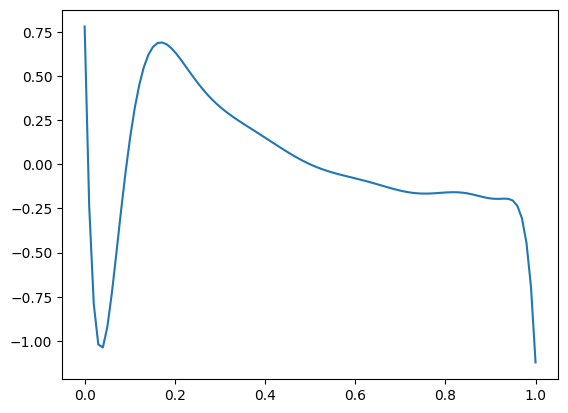

In [11]:
# %%
X = np.linspace(0.0,1.0,100)
I = np.ones(100)
Vint = np.array([V_INT(x,Ap) for x in X])

plt.plot(X,Vint)

In [13]:
# %%
mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1),
])
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-2), loss="mse", metrics=["mae"])
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 16        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# %%
# Y = np.linspace(0.75,-1.1,100)
# Y = np.hstack([np.ones(20)*0.75, np.linspace(0.75,-0.25,75), np.linspace(-0.25,-1.0,5)])
# Y = np.hstack([np.linspace(1.0,-0.25,95), np.linspace(-0.25,-1.0,5)])
Y = np.hstack([np.linspace(0.85,-0.2,90), np.linspace(-0.25,-0.8,10)])

def scheduler(epoch):
    if epoch < 800:
        return 2e-2
    elif epoch < 1100:
        return 1e-2
    elif epoch < 2200:
        return 5e-3
    else:
        return 1e-3

mlp.fit(X,Y, epochs=2400, callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])
#mlp.fit(np.stack([X,I],1),Y, epochs=2400, callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

Epoch 1/2400
4/4 [==============================] - 1s 6ms/step - loss: 0.2031 - mae: 0.3902 - lr: 0.0200
Epoch 2/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.1557 - mae: 0.3138 - lr: 0.0200
Epoch 3/2400
4/4 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.2172 - lr: 0.0200
Epoch 4/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.2382 - lr: 0.0200
Epoch 5/2400
4/4 [==============================] - 0s 5ms/step - loss: 0.0169 - mae: 0.0810 - lr: 0.0200
Epoch 6/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.0243 - mae: 0.1237 - lr: 0.0200
Epoch 7/2400
4/4 [==============================] - 0s 5ms/step - loss: 0.0131 - mae: 0.0973 - lr: 0.0200
Epoch 8/2400
4/4 [==============================] - 0s 3ms/step - loss: 0.0174 - mae: 0.1114 - lr: 0.0200
Epoch 9/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.0824 - lr: 0.0200
Epoch 10/2400
4/4 [===========================

In [ ]:
# %%
# mlp.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss="mse", metrics=["mae"])
# mlp.fit(X[90:],Vint[90:], epochs=500)

[array([[ 1.3569982 , -0.84581953,  0.6224112 ,  0.9123862 , -0.25822204,
         0.56585985,  0.76752603, -0.65899426]], dtype=float32), array([-1.2814038 ,  0.72819746,  0.9267642 , -0.79857284,  0.42182547,
       -0.37346214, -0.61576253,  0.5695678 ], dtype=float32), array([[ 1.5344541 , -2.7655838 ,  0.05744975,  0.42515457],
       [-1.17987   ,  2.0112977 ,  0.20982112, -0.5400849 ],
       [-0.8591663 ,  0.7809058 , -0.739287  , -0.19644767],
       [ 0.5717079 , -1.9651735 , -0.5887161 , -0.3646241 ],
       [-0.44708338,  0.4824129 , -0.18433893,  1.0118033 ],
       [ 0.47658715, -0.28898415, -0.15867072,  0.00316128],
       [ 0.7892859 , -0.8681333 , -0.55259883, -0.19112515],
       [-1.9534479 ,  1.5359997 ,  0.22938606,  0.33034325]],
      dtype=float32), array([-0.06404151,  0.45364583, -0.00831912,  0.01423486], dtype=float32), array([[0.23208836],
       [1.0754952 ],
       [1.0017295 ],
       [0.03098469]], dtype=float32), array([-0.32335156], dtype=float32)]
S

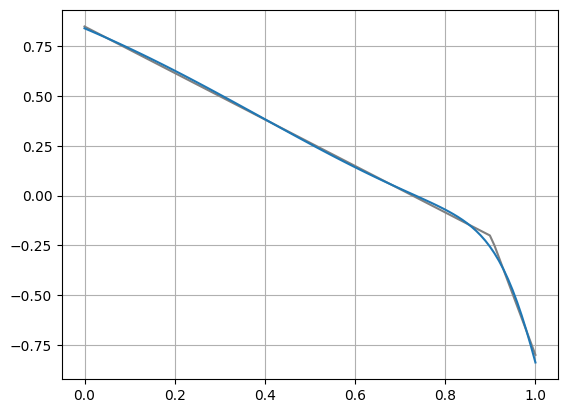

In [15]:
# %%
print(mlp.get_weights())
b = np.array(mlp.get_weights(),dtype='object')
print("Shape of this array is ",b.shape)
# np.save('mlp_initial_weights.npy', mlp.get_weights())
try:
    np.save('../training/mlp_initial_weight_with-I.npy', b)
except:
    file = open('../training/mlp_initial_weight_with-I.npy', 'w+')
    np.save('../training/mlp_initial_weight_with-I.npy', mlp.get_weights())

pred = mlp.predict(X)
#pred = mlp.predict(np.stack([X,I],1))

plt.plot(X,Y, color='gray')
plt.plot(X,pred)
plt.grid()

plt.show()

# PIPELINE EXPLAINED BELOW 
#### Data Ingestion
## First Data is downloaded via data_retrieval.py 
## Already done above 
## Then Battery Data is extracted from the dataset in :
## a) TF/battery_data.py --> Simply extracts the data
## b) TF/battery_data_random_walk_data.py --> Extracts and plot the good stuff(V,I,W etc.)

In [26]:
#I-V Characteristics of batteries under various loading conditions

#%matplotlib inline
#TODO: If you are running from above the chdir will put you in the wrong directory
!python TF/battery_data.py


Figure(640x480)


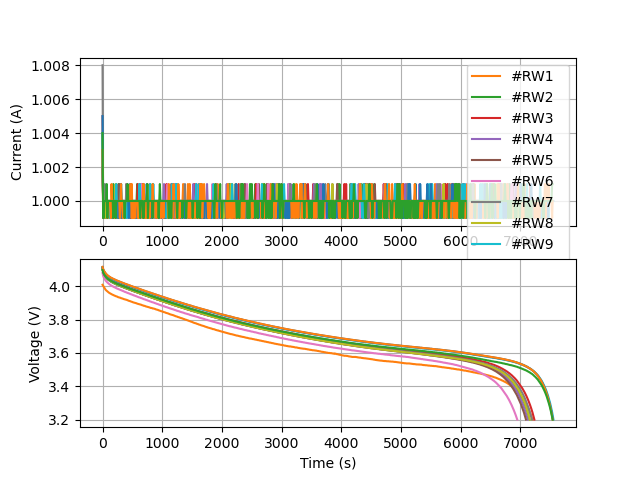

In [27]:
#I-V Characteristics being plotted here
Image(filename='TF/figures/I-VCharacteristics.png')

In [30]:
#Random walk emulates loading conditions from the charge discharge data
!python TF/battery_random_walk_data.py

Figure(640x480)
Figure(640x480)
Figure(640x480)


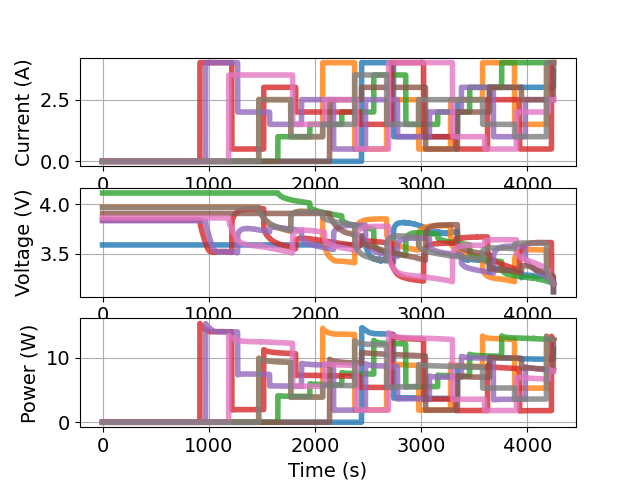

In [32]:
#%matplotlib inline
#TODO: @Antonio these are the randomized loadings .Current is forced. Voltage is the response.
Image(filename='TF/figures/rwdata.png')